In [207]:
import numpy as np
import pandas as pd
import pickle

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
import tensorflow.keras.backend as K

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import losses


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/D190003/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Loading
(DATAFRAME COMBINATION)

In [2]:
data = pd.read_csv('all-data.csv', names=['category', 'clean_text'], encoding='latin-1')
df1 = pd.read_csv('Twitter_Data.csv')
df2 = pd.read_csv('apple-twitter-sentiment-texts.csv')
df2 = df2.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df2['category'] = df2['category'].map({-1: -1.0, 0: 0.0, 1:1.0})
df3 = pd.read_csv('finalSentimentdata2.csv')
df3 = df3.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df3['category'] = df3['category'].map({'sad': -1.0, 'anger': -1.0, 'fear': -1.0, 'joy':1.0})
df3 = df3.drop(['Unnamed: 0'], axis=1)
df4 = pd.read_csv('Tweets.csv')
df4 = df4.rename(columns={'text': 'clean_text', 'airline_sentiment':'category'})
df4['category'] = df4['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
df4 = df4[['category','clean_text']]
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df.dropna(axis=0, inplace=True)
df['category'] = df['category'].map({-1.0:'negative', 0.0:'neutral', 1.0:'positive'})
die= pd.concat([df, data], ignore_index=True)

In [160]:
dat = pd.read_csv('lumina.csv',names=['y','1', '2','3','4','text'], encoding='latin-1')
dat['y'] = dat['y'].map({0: 'negative', 2:'neutral', 4:'positive'})
dat

,y,1,2,3,4,text
0,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [162]:
dice=dat
dice=dice.drop(dice[dice.y =="neutral"].index)
dice

,y,1,2,3,4,text
0,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
die

,clean_text,category
0,when modi promised “minimum government maximum...,negative
1,talk all the nonsense and continue all the dra...,neutral
2,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,positive
4,answer who among these the most powerful world...,positive
...,...,...
187170,LONDON MarketWatch -- Share prices ended lower...,negative
187171,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
187172,Operating profit fell to EUR 35.4 mn from EUR ...,negative
187173,Net sales of the Paper segment decreased to EU...,negative


In [51]:
dice=die
dice=dice.drop(dice[dice.category =="neutral"].index)
dice

,clean_text,category
0,when modi promised “minimum government maximum...,negative
2,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,positive
4,answer who among these the most powerful world...,positive
8,with upcoming election india saga going import...,positive
...,...,...
187169,HELSINKI Thomson Financial - Shares in Cargote...,negative
187170,LONDON MarketWatch -- Share prices ended lower...,negative
187172,Operating profit fell to EUR 35.4 mn from EUR ...,negative
187173,Net sales of the Paper segment decreased to EU...,negative


In [40]:
def con(elon):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = elon.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", die['clean_text'][21])
print("\nProcessed tweet ->", con(die['clean_text'][21]))

# Apply data processing to each sentence
X = list(map(con, die['clean_text']))

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(die['category'])


Original tweet -> with firm belief the leadership shri narendra modi bjp entering into politics given form file nomination for the khammam parliamentary seat proceeding khammam today 

Processed tweet -> ['firm', 'belief', 'leadership', 'shri', 'narendra', 'modi', 'bjp', 'enter', 'polit', 'given', 'form', 'file', 'nomin', 'khammam', 'parliamentari', 'seat', 'proceed', 'khammam', 'today']


In [38]:
with open('X.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

with open('Y.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

# Preprocessing

In [164]:
import re
import string

# # download missing resource
# import nltk
# nltk.download("stopwords")

from nltk.corpus import stopwords
from emot.emo_unicode import UNICODE_EMOJI  # for emojis
from emot.emo_unicode import EMOTICONS_EMO  # for emoticons

# Converting emojis to words
def convert_emojis(text):
    for i in text:
        if i in UNICODE_EMOJI.keys():
            try:
                text = text.replace(i, f' {"_".join(UNICODE_EMOJI[i].replace(",","").replace(":","").split())}')
            except:
                continue
    
    return text


# Converting emoticons to words    
def convert_emoticons(text):
    for i in text.split():
        if i in EMOTICONS_EMO.keys():
            text = text.replace(i, "_".join(EMOTICONS_EMO[i].replace(",","").split()))
    return text


# Function for removing urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


# custom punctuation
punctuations = string.punctuation + "´‘’“”…–€«»"

# Function to replace/remove junk seen during manual labelling
def dejunk(text):
    text = re.sub(r"𝓟𝓻𝓲𝓬𝓮𝓵𝓮𝓼𝓼 𝓲𝓼 𝓽𝓱𝓮 𝓶𝓸𝓼𝓽 𝓿𝓪𝓵𝓾𝓪𝓫𝓵𝓮 𝓪𝓼𝓼𝓮𝓽 𝓽𝓸 𝓸𝔀𝓷 𝓲𝓯 𝔂𝓸𝓾 𝓪𝓻𝓮 𝓵𝓾𝓬𝓴𝔂 𝓮𝓷𝓸𝓾𝓰𝓱 𝓽𝓸 𝓫𝓮 𝓪𝓫𝓵𝓮 𝓽𝓸 𝓪𝓬𝓺𝓾𝓲𝓻𝓮 𝓲𝓽", 
                  "priceless is the most valuable asset to own if you are lucky enough to be able to acquire it", text)
    text = re.sub(r"wth", "what the hell", text) 
    text = re.sub(r"wtf", "what the fuck", text) 
    text = re.sub(r"&amp;", "and", text)  # &
    text = re.sub(r"&gt;", "", text)  # >
    text = re.sub(r"&lt;", "", text)  # <
    text = re.sub(r"1⃣", "1. ", text)
    text = re.sub(r"2⃣", "2. ", text)
    text = re.sub(r"3⃣", "3. ", text)
    text = re.sub(r"4⃣", "4. ", text)

    return text

#making a text-cleaning function
def preprocess_text(text):
    
    #convert lowercase
    cleaned_text = text.lower()

    # Replace/remove junk text
    cleaned_text = dejunk(cleaned_text)
    
     #convert emoji into words
    cleaned_text = convert_emojis(cleaned_text)
    
     # convert emoticons into words
    cleaned_text = convert_emoticons(cleaned_text)
    
     # remove urls
    cleaned_text = remove_urls(cleaned_text)
    
    #remove punctuations
    nopunc = [char for char in cleaned_text if char not in punctuations]
    nopunc = ''.join(nopunc)
    
#     #remove stopwords
#     clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    #return cleaned text
#    return ' '.join(nopunc)
    return nopunc

dice["text"] = dice["text"].apply(preprocess_text)
dice

,y,1,2,3,4,text
0,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...
1,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
3,negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...
...,...,...,...,...,...,...
1599995,positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having no school is the best feel...
1599996,positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom very cool to hear old walt intervie...
1599997,positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover ask me fo...
1599998,positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time tup...


In [165]:
with open('lumina.pickle', 'wb') as handle:
    pickle.dump(dice, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('lumina.pickle', 'rb') as handle:
    vad = pickle.load(handle)
vad

,y,1,2,3,4,text
0,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...
1,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
3,negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...
...,...,...,...,...,...,...
1599995,positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having no school is the best feel...
1599996,positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom very cool to hear old walt intervie...
1599997,positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover ask me fo...
1599998,positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time tup...


In [202]:
max_words=10000
def get_sequences(texts):
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(texts)
    
    sequences = tokenizer.texts_to_sequences(texts)
    print("Vocab length:", len(tokenizer.word_index) + 1)
    
    max_seq_length = np.max(list(map(lambda x: len(x), sequences)))
    print("Maximum sequence length:", max_seq_length) #63
    
    sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    
    return sequences,tokenizer

In [203]:
sequences, tokenizer = get_sequences(dice['text'])
with open('pearl.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

Vocab length: 782074
Maximum sequence length: 40


In [204]:
sequences

array([[481, 101,   4, ...,   0,   0,   0],
       [  8, 781,  18, ...,   0,   0,   0],
       [  1, 307, 346, ...,   0,   0,   0],
       ...,
       [ 36,   7, 199, ...,   0,   0,   0],
       [117, 262,   2, ...,   0,   0,   0],
       [117,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [206]:
dice['text']

0          switchfoot   awww thats a bummer  you shoulda ...
1          is upset that he cant update his facebook by t...
2          kenichan i dived many times for the ball manag...
3            my whole body feels itchy and like its on fire 
4          nationwideclass no its not behaving at all im ...
                                 ...                        
1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy 38th birthday to my boo of alll time tup...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

In [17]:
sequences, tokenizer = get_sequences(dice['clean_text'])
print('After Tokenization & Padding \n', sequences[21])

Vocab length: 104649
Maximum sequence length: 63
After Tokenization & Padding 
 [ 529   59 1098  837 1904  157    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


In [61]:
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [18]:
y = pd.get_dummies(dice['category'])
X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (75111, 63) (75111, 2)
Validation Set -> (25037, 63) (25037, 2)
Test Set -> (25037, 63) (25037, 2)


In [168]:
y = pd.get_dummies(dice['y'])
X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size=0.1, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
#print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (1440000, 40) (1440000, 2)
Test Set -> (160000, 40) (160000, 2)


In [169]:
X_train

array([[348, 242, 163, ...,   0,   0,   0],
       [  1,  39,  64, ...,   0,   0,   0],
       [547,   2,  32, ...,   0,   0,   0],
       ...,
       [  1, 353,   2, ...,   0,   0,   0],
       [219,   2,   6, ...,   0,   0,   0],
       [ 79,  60,  39, ...,   0,   0,   0]], dtype=int32)

In [170]:
y_train

,negative,positive
266534,1,0
301304,1,0
330079,1,0
1427748,0,1
876907,0,1
...,...,...
836489,0,1
491263,1,0
470924,1,0
491755,1,0


# Training

In [171]:
def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

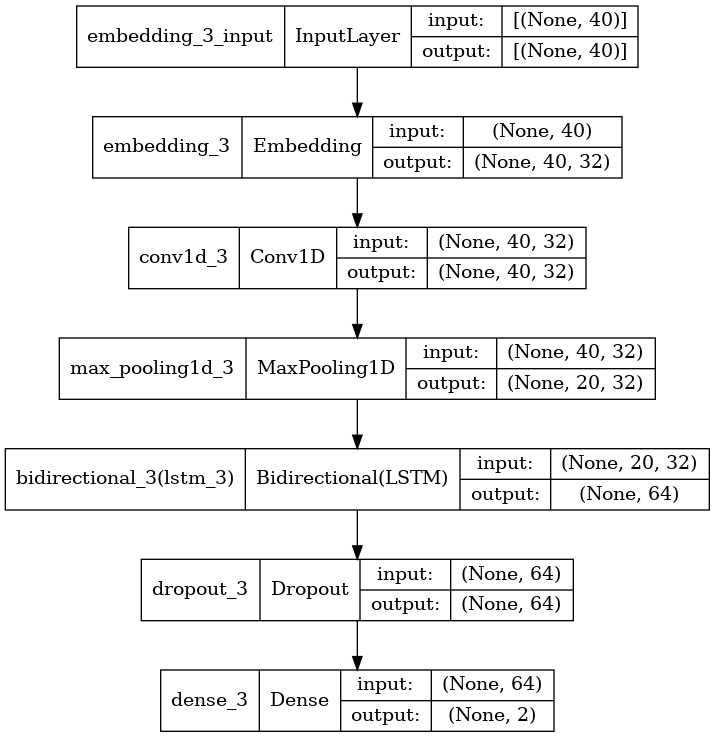

In [174]:
vocab_size = 10000
embedding_size = 32
epochs=5
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=40))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
tf.keras.utils.plot_model(model, show_shapes=True)

In [175]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 40, 32)            160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 40, 32)            3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 20, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [26]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9204
Precision : 0.9204
Recall    : 0.9204
F1 Score  : 0.9204


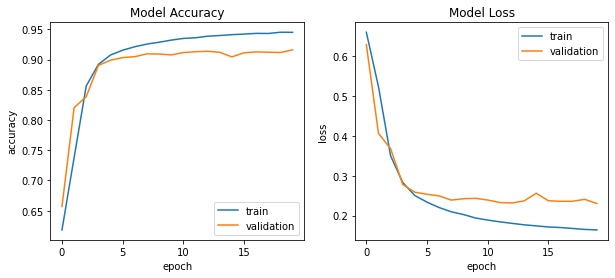

In [27]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

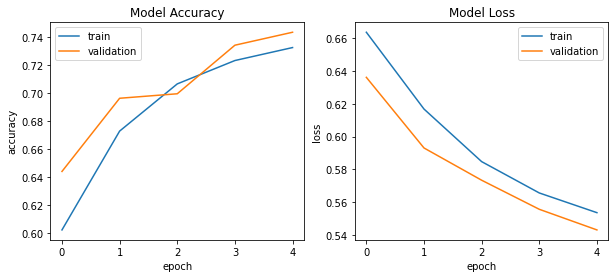

In [176]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

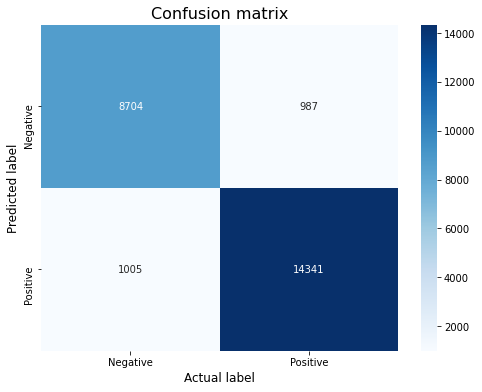

In [29]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [30]:
# Save the model architecture & the weights
model.save('polarbear.h5')
print('Best model saved')

Best model saved


In [106]:
y_train

,negative,positive
74076,0,1
111011,1,0
49601,0,1
16456,0,1
34255,0,1
...,...,...
55904,0,1
87105,1,0
122159,0,1
23508,0,1


In [108]:
df#["clean_review"]

,review,y,clean_review,clean_review2,elon,money,china,country,people
0,mmmm yes forward thinking like underground tub...,-1.0,mmmm yes forward thinking like underground tub...,"[mmmm, yes, forward, thinking, like, undergrou...",0.287376,0.450112,0.426620,0.498184,0.206443
1,cool decade ever rocket going space come would...,1.0,cool decade ever rocket going space come would...,"[cool, decade, ever, rocket, going, space, com...",0.500462,0.487662,0.380660,0.415369,0.525181
2,famous people like steve jobs never used among...,1.0,famous people like steve jobs never used among...,"[famous, people, like, steve, jobs, never, use...",0.415128,0.472276,0.268279,0.326500,0.532759
3,average rent apartment los angeles 2786 month ...,1.0,average rent apartment los angeles 2786 month ...,"[average, rent, apartment, los, angeles, 2786,...",0.418650,0.397595,0.293749,0.400587,0.505202
4,name patent proves father died eight patents f...,-1.0,name patent proves father died eight patents f...,"[name, patent, proves, father, died, eight, pa...",0.454185,0.446138,0.409573,0.431018,0.498380
...,...,...,...,...,...,...,...,...,...
177,whole point freedom quantified things limit fr...,-1.0,whole point freedom quantified things limit fr...,"[whole, point, freedom, quantified, things, li...",0.533607,0.545478,0.390866,0.404598,0.523754
178,lol fail logics class well,-1.0,lol fail logics class well,"[lol, fail, logics, class, well]",0.525665,0.181214,0.231830,0.129381,0.431794
179,dorsey worse lama spitting animal give break,-1.0,dorsey worse lama spitting animal give break,"[dorsey, worse, lama, spitting, animal, give, ...",0.342906,0.436414,0.386591,0.289408,0.444230
180,facewithtearsofjoy facewithtearsofjoy facewith...,-1.0,facewithtearsofjoy facewithtearsofjoy facewith...,"[facewithtearsofjoy, facewithtearsofjoy, facew...",0.384474,0.441904,0.501833,0.401033,0.460583


In [186]:
df9 = pd.read_csv('data_labelling_tweets.csv', header=0)
df9= df9[['text', 'label']]
df9=df9.drop(df9[df9.label ==0].index)
df9

,text,label
1,"@Teslaconomics @elonmusk Ignorance is bliss,\n...",-1
2,@elonmusk The baby is upset he didn't own it f...,1
3,@deepakravindran Blue for all. Socialism! but ...,-1
7,@elonmusk Who needs hopium when we have @brave...,1
8,@elonmusk Except its not really tied to one co...,1
...,...,...
592,@TheMarcitect @KimDotcom @elonmusk I've had pe...,-1
594,@elonmusk @mysteriouskat Great,1
596,"I hated every minute of training, but I said, ...",1
597,Wth is this @elonmusk 😭😭 https://t.co/hbXL3WZpMf,-1


In [143]:
df9.groupby('label').nunique()

,text
label,
-1,170
1,151


In [187]:
import re
import string

# # download missing resource
# import nltk
# nltk.download("stopwords")

from nltk.corpus import stopwords
from emot.emo_unicode import UNICODE_EMOJI  # for emojis
from emot.emo_unicode import EMOTICONS_EMO  # for emoticons

# Converting emojis to words
def convert_emojis(text):
    for i in text:
        if i in UNICODE_EMOJI.keys():
            try:
                text = text.replace(i, f' {"_".join(UNICODE_EMOJI[i].replace(",","").replace(":","").split())}')
            except:
                continue
    
    return text


# Converting emoticons to words    
def convert_emoticons(text):
    for i in text.split():
        if i in EMOTICONS_EMO.keys():
            text = text.replace(i, "_".join(EMOTICONS_EMO[i].replace(",","").split()))
    return text


# Function for removing urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


# custom punctuation
punctuations = string.punctuation + "´‘’“”…–€«»"

# Function to replace/remove junk seen during manual labelling
def dejunk(text):
    text = re.sub(r"𝓟𝓻𝓲𝓬𝓮𝓵𝓮𝓼𝓼 𝓲𝓼 𝓽𝓱𝓮 𝓶𝓸𝓼𝓽 𝓿𝓪𝓵𝓾𝓪𝓫𝓵𝓮 𝓪𝓼𝓼𝓮𝓽 𝓽𝓸 𝓸𝔀𝓷 𝓲𝓯 𝔂𝓸𝓾 𝓪𝓻𝓮 𝓵𝓾𝓬𝓴𝔂 𝓮𝓷𝓸𝓾𝓰𝓱 𝓽𝓸 𝓫𝓮 𝓪𝓫𝓵𝓮 𝓽𝓸 𝓪𝓬𝓺𝓾𝓲𝓻𝓮 𝓲𝓽", 
                  "priceless is the most valuable asset to own if you are lucky enough to be able to acquire it", text)
    text = re.sub(r"wth", "what the hell", text) 
    text = re.sub(r"wtf", "what the fuck", text) 
    text = re.sub(r"&amp;", "and", text)  # &
    text = re.sub(r"&gt;", "", text)  # >
    text = re.sub(r"&lt;", "", text)  # <
    text = re.sub(r"1⃣", "1. ", text)
    text = re.sub(r"2⃣", "2. ", text)
    text = re.sub(r"3⃣", "3. ", text)
    text = re.sub(r"4⃣", "4. ", text)

    return text

#making a text-cleaning function
def preprocess_text(text):
    
    #convert lowercase
    cleaned_text = text.lower()

    # Replace/remove junk text
    cleaned_text = dejunk(cleaned_text)
    
     #convert emoji into words
    cleaned_text = convert_emojis(cleaned_text)
    
     # convert emoticons into words
    cleaned_text = convert_emoticons(cleaned_text)
    
     # remove urls
    cleaned_text = remove_urls(cleaned_text)
    
    #remove punctuations
    nopunc = [char for char in cleaned_text if char not in punctuations]
    nopunc = ''.join(nopunc)
    
#     #remove stopwords
#     clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    #return cleaned text
#    return ' '.join(nopunc)
    return nopunc

df9["text"] = df9["text"].apply(preprocess_text)
df9['label'] = df9['label'].map({-1: "negative", 1:"positive"})

df9

,text,label
1,teslaconomics elonmusk ignorance is bliss\nor\...,negative
2,elonmusk the baby is upset he didnt own it first,positive
3,deepakravindran blue for all socialism but pay...,negative
7,elonmusk who needs hopium when we have brave o...,positive
8,elonmusk except its not really tied to one com...,positive
...,...,...
592,themarcitect kimdotcom elonmusk ive had people...,negative
594,elonmusk mysteriouskat great,positive
596,i hated every minute of training but i said do...,positive
597,what the hell is this elonmusk loudlycryingfa...,negative


In [195]:
max_words=10000
def get_sequences2(texts):
#     tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    
    sequences = tokenizer.texts_to_sequences(texts)
    print("Vocab length:", len(tokenizer.word_index) + 1)
        
    sequences = pad_sequences(sequences, maxlen=40, padding='post')
    
    return sequences
df = pd.read_csv("ASPA.csv")
sequences2 = get_sequences2(df["cleaned_text"])
sequences2

Vocab length: 782074


array([[1844,  155,  373, ...,    0,    0,    0],
       [ 196,  218,   44, ...,    0,    0,    0],
       [1924,  144,   35, ...,    0,    0,    0],
       ...,
       [ 761, 2405,  317, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [  60,  167,  207, ...,    0,    0,    0]], dtype=int32)

In [196]:
sequences9 = get_sequences2(df9["text"])
sequences9

Vocab length: 782074


array([[   8, 4182,   99, ...,    0,    0,    0],
       [   3,  275,    8, ...,    0,    0,    0],
       [ 922,   10,   33, ...,    0,    0,    0],
       ...,
       [   1, 3243,  401, ...,    0,    0,    0],
       [  52,    3,  395, ...,    0,    0,    0],
       [  52,   63,   38, ...,    0,    0,    0]], dtype=int32)

In [197]:
dfsume=df#["y"]
#dfsume['review'] = df.loc[:,"clean_review"]
dfsume['label'] = dfsume['label'].map({-1.0: "negative", 1.0:"positive"})
dfsume

,cleaned_text,label,clean_text2,elon,money,china,country,people
0,mmmm yes forward thinking like underground tub...,negative,"['mmmm', 'yes', 'forward', 'thinking', 'like',...",0.287376,0.450112,0.426620,0.498184,0.206443
1,cool decade ever rocket going space come would...,positive,"['cool', 'decade', 'ever', 'rocket', 'going', ...",0.500462,0.487662,0.380660,0.415369,0.525181
2,famous people like steve jobs never used among...,positive,"['famous', 'people', 'like', 'steve', 'jobs', ...",0.415128,0.472276,0.268279,0.326500,0.532759
3,average rent apartment los angeles 2786 month ...,positive,"['average', 'rent', 'apartment', 'los', 'angel...",0.418650,0.397595,0.293749,0.400587,0.505202
4,name patent proves father died eight patents f...,negative,"['name', 'patent', 'proves', 'father', 'died',...",0.454185,0.446138,0.409573,0.431018,0.498380
...,...,...,...,...,...,...,...,...
177,whole point freedom quantified things limit fr...,negative,"['whole', 'point', 'freedom', 'quantified', 't...",0.533608,0.545478,0.390866,0.404598,0.523753
178,lol fail logics class well,negative,"['lol', 'fail', 'logics', 'class', 'well']",0.525665,0.181214,0.231830,0.129381,0.431794
179,dorsey worse lama spitting animal give break,negative,"['dorsey', 'worse', 'lama', 'spitting', 'anima...",0.342906,0.436414,0.386591,0.289408,0.444230
180,facewithtearsofjoy facewithtearsofjoy facewith...,negative,"['facewithtearsofjoy', 'facewithtearsofjoy', '...",0.384474,0.441904,0.501833,0.401033,0.460583


In [198]:
y = pd.get_dummies(dfsume.label)
y.head()

,negative,positive
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [199]:
y9 = pd.get_dummies(df9.label)
y9.head()

,negative,positive
1,1,0
2,0,1
3,1,0
7,0,1
8,0,1


In [200]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(sequences2, y ,batch_size=64)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(sequences2[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
3/3 [==============================] - 1s 4ms/step - loss: 0.7016 - accuracy: 0.5220 - precision_3: 0.5220 - recall_3: 0.5220
test loss, test acc: [0.7015702128410339, 0.5219780206680298, 0.5219780206680298, 0.5219780206680298]
Generate predictions for 3 samples
predictions shape: (3, 2)


In [201]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(sequences9, y9 ,batch_size=64)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(sequences9[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
6/6 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.6012 - precision_3: 0.6012 - recall_3: 0.6012
test loss, test acc: [0.706524670124054, 0.6012461185455322, 0.6012461185455322, 0.6012461185455322]
Generate predictions for 3 samples
predictions shape: (3, 2)


In [148]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(sequences9, y9 ,batch_size=64)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(sequences9[:3])
print("predictions:", predictions)

Evaluate on test data
6/6 [==============================] - 0s 3ms/step - loss: 1.0435 - accuracy: 0.6511 - precision_1: 0.6511 - recall_1: 0.6511
test loss, test acc: [1.0435152053833008, 0.6510903239250183, 0.6510903239250183, 0.6510903239250183]
Generate predictions for 3 samples
predictions: [[0.88563985 0.11436015]
 [0.0072013  0.9927987 ]
 [0.31045848 0.68954146]]


In [151]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print(sentiment_dict)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")

In [152]:
sentiment_scores("lalala this is bizarre like your mom")

{'neg': 0.235, 'neu': 0.51, 'pos': 0.255, 'compound': 0.0516}
Overall sentiment dictionary is :  {'neg': 0.235, 'neu': 0.51, 'pos': 0.255, 'compound': 0.0516}
sentence was rated as  23.5 % Negative
sentence was rated as  51.0 % Neutral
sentence was rated as  25.5 % Positive
Sentence Overall Rated As Positive


In [154]:
sid_obj = SentimentIntensityAnalyzer()
tad=[]
for i in df9["text"]:
    sentiment_dict = sid_obj.polarity_scores(i)
    if (sentiment_dict['compound']>0):
        tad.append("positive")
    else:
        tad.append("negative")
tad

['positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',

In [155]:
col_list = df9.label.values.tolist()
from sklearn.metrics import accuracy_score
accuracy_score(col_list , tad)

0.7570093457943925

In [156]:
sid_obj = SentimentIntensityAnalyzer()
tad=[]
for i in dfsume["clean_review"]:
    sentiment_dict = sid_obj.polarity_scores(i)
    if (sentiment_dict['compound']>0):
        tad.append("positive")
    else:
        tad.append("negative")
        
col_list = dfsume.y.values.tolist()
from sklearn.metrics import accuracy_score
accuracy_score(col_list , tad)

0.6318681318681318

In [ ]:
data_labelling_tweets.csv

In [171]:
for i in dfsume["clean_review"]:
    sentiment_dict = sid_obj.polarity_scores(i)
    if (sentiment_dict['compound']>0):
        tad.append("positive")
    else:
        tad.append("negative")
        
col_list = dfsume.y.values.tolist()

In [172]:
accuracy_score(col_list , tad)

0.8463568668634786


In [119]:
from keras.models import load_model

# Load model
model = load_model('polarbear.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['negative', 'positive']
    max_len=63
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt)#.argmax(axis=1)
    # Print the predicted sentiment
    print(yt[0][0])
    if yt[0][0]<0.5:
        print('The predicted sentiment is', sentiment_classes[1])
    else:
        print('The predicted sentiment is', sentiment_classes[0])

In [39]:
predict_class(['I hate freeriders'])

0.99785656
The predicted sentiment is negative


In [38]:
predict_class(['I LOVE THIS!'])

0.004400846
The predicted sentiment is positive


In [120]:
predict_class(['The people are excited about the future'])

0.021457907
The predicted sentiment is positive


In [45]:
predict_class(['you are a piece of shit, faker'])

0.93476176
The predicted sentiment is negative


# ABSA

In [217]:
def word_tokenizer(text):
    try:
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = text.split()
    except:
        text=[]

    return text

from tqdm import tqdm

tqdm.pandas()

# dice['clean_text2'] =dice['clean_text'].apply(word_tokenizer)
# dice

In [53]:
data_words = dice['clean_text2'].values.tolist()
len(data_words)

125185

In [54]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1)]


In [55]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint

# number of topics
num_topics = 10
# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.039*"modi" + 0.029*"and" + 0.020*"the" + 0.011*"you" + 0.009*"that" + '
  '0.009*"for" + 0.009*"will" + 0.007*"this" + 0.007*"your" + 0.007*"what"'),
 (1,
  '0.042*"modi" + 0.028*"the" + 0.018*"and" + 0.011*"you" + 0.011*"this" + '
  '0.011*"are" + 0.010*"not" + 0.008*"india" + 0.008*"for" + 0.007*"was"'),
 (2,
  '0.040*"modi" + 0.017*"india" + 0.017*"for" + 0.015*"the" + 0.010*"will" + '
  '0.009*"with" + 0.009*"are" + 0.009*"that" + 0.008*"you" + 0.007*"not"'),
 (3,
  '0.031*"the" + 0.027*"modi" + 0.015*"and" + 0.013*"are" + 0.012*"for" + '
  '0.011*"with" + 0.009*"have" + 0.007*"to" + 0.007*"this" + 0.006*"will"'),
 (4,
  '0.033*"modi" + 0.021*"for" + 0.015*"the" + 0.012*"with" + 0.010*"and" + '
  '0.010*"this" + 0.009*"you" + 0.007*"to" + 0.006*"have" + 0.006*"are"'),
 (5,
  '0.033*"and" + 0.032*"modi" + 0.030*"the" + 0.015*"for" + 0.014*"not" + '
  '0.010*"you" + 0.010*"with" + 0.008*"has" + 0.008*"but" + 0.007*"that"'),
 (6,
  '0.043*"modi" + 0.021*"the" + 0.018*"and" +

In [208]:
ser = pd.read_csv('combined.csv', encoding='latin-1')
ser

,platform_id,date,text,cleaned_text,title,post_text,subreddit,author,upvote_ratio,score,retweet_count,like_count,url,link,num_comments,tags,source,subjectivity,sentiment
0,12150g4,2023-03-25 00:46:43,Liftoff.54321.,liftoff54321,Liftoff.54321.,NaN,elonmusk,ZaroonKhan5,0.91,290.0,NaN,NaN,reddit.com/r/elonmusk/comments/12150g4/liftoff...,https://v.redd.it/e72u906e8spa1,18.0,['SpaceX'],reddit_sub,NaN,NaN
1,120n1qh,2023-03-24 15:04:18,Musk denies multibillion investment in SpaceX ...,musk denies multibillion investment spacex sau...,Musk denies multibillion investment in SpaceX ...,NaN,elonmusk,Alex_ZH1,0.92,339.0,NaN,NaN,reddit.com/r/elonmusk/comments/120n1qh/musk_de...,https://www.quicktechnics.com/en/post/musk-den...,69.0,['SpaceX'],reddit_sub,NaN,NaN
2,121ofyl,2023-03-25 14:56:49,"Elon Musk tells Twitter employees ""Office is n...",elon musk tells twitter employees office optio...,"Elon Musk tells Twitter employees ""Office is n...",NaN,elonmusk,Express_Turn_5489,1.00,2.0,NaN,NaN,reddit.com/r/elonmusk/comments/121ofyl/elon_mu...,https://www.kumaonjagran.com/elon-musk-tells-t...,2.0,['Tweets'],reddit_sub,NaN,NaN
3,1215ef2,2023-03-25 01:01:24,Elon Musk believes Neuralink can help address ...,elon musk believes neuralink help address self...,Elon Musk believes Neuralink can help address ...,NaN,elonmusk,Pawnti,0.61,6.0,NaN,NaN,reddit.com/r/elonmusk/comments/1215ef2/elon_mu...,https://www.httnews.com/technology/eyi02xa6agb...,11.0,['Tweets'],reddit_sub,NaN,NaN
4,11zpwfi,2023-03-23 16:41:50,"WHO Warns Of ""Fake News"" After Elon Musk Pande...",warns fake news elon musk pandemic treaty tweet,"WHO Warns Of ""Fake News"" After Elon Musk Pande...",NaN,elonmusk,erinswider,0.86,281.0,NaN,NaN,reddit.com/r/elonmusk/comments/11zpwfi/who_war...,https://globenewsbulletin.com/world/who-warns-...,165.0,['Tweets'],reddit_sub,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12671,1639256815354404865,2023-03-24 21:24:15,We are damaging the environment. But not by us...,damaging environment using much energy using e...,NaN,NaN,NaN,alexandre_lores,NaN,NaN,3.0,14.0,https://twitter.com/alexandre_lores/status/163...,NaN,NaN,NaN,twitter,NaN,NaN
12672,1639256812741357571,2023-03-24 21:24:14,@elonmusk Yasðð very good,elonmusk yas smilingfacewithsmilingeyes smilin...,NaN,NaN,NaN,ashutos07601960,NaN,NaN,0.0,0.0,https://twitter.com/ashutos07601960/status/163...,NaN,NaN,NaN,twitter,NaN,NaN
12673,1639256808979337216,2023-03-24 21:24:13,"@runews @elonmusk ""became aware"" you, nasty pu...",runews elonmusk became aware nasty pulitzer,NaN,NaN,NaN,pates_karbo,NaN,NaN,0.0,0.0,https://twitter.com/pates_karbo/status/1639256...,NaN,NaN,NaN,twitter,NaN,NaN
12674,1639256805673975808,2023-03-24 21:24:13,@luffysmayie Elon Musk sucks so bad,luffysmayie elon musk sucks bad,NaN,NaN,NaN,IIuffy,NaN,NaN,0.0,0.0,https://twitter.com/IIuffy/status/163925680567...,NaN,NaN,NaN,twitter,NaN,NaN


In [184]:
df1 = pd.read_csv('cmts_cleaned_labelled.csv', header=0)
df1 = df1[['cleaned_text', 'label']]
df1 = df1[:382]
df1 

,cleaned_text,label
0,mmmm yes forward thinking like underground tub...,-1.0
1,probably like attaching horse automobile would...,0.0
2,cool decade ever rocket going space come would...,1.0
3,famous people like steve jobs never used among...,1.0
4,average rent apartment los angeles 2786 month ...,1.0
...,...,...
377,facewithtearsofjoy facewithtearsofjoy facewith...,-1.0
378,really say look laws yada yada yada get person...,-1.0
379,guess fundamental differences opinions guess u...,0.0
380,let google wikipedia page lists organisations ...,0.0


In [185]:
df2=df1.drop(df1[df1.label ==0.0].index)
df2

,cleaned_text,label
0,mmmm yes forward thinking like underground tub...,-1.0
2,cool decade ever rocket going space come would...,1.0
3,famous people like steve jobs never used among...,1.0
4,average rent apartment los angeles 2786 month ...,1.0
5,name patent proves father died eight patents f...,-1.0
...,...,...
374,whole point freedom quantified things limit fr...,-1.0
375,lol fail logics class well,-1.0
376,dorsey worse lama spitting animal give break,-1.0
377,facewithtearsofjoy facewithtearsofjoy facewith...,-1.0


In [68]:
df2.groupby('label').nunique()

,cleaned_text
label,
-1.0,127
1.0,52


In [218]:
# df2['clean_text2'] =df2['cleaned_text'].apply(word_tokenizer)
# data_words = df2['clean_text2'].values.tolist()
ser['cleaned_text2']=ser['cleaned_text'].apply(word_tokenizer)
data_words = ser['cleaned_text2'].values.tolist()
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1)]


In [219]:
ser

,platform_id,date,text,cleaned_text,title,post_text,subreddit,author,upvote_ratio,score,retweet_count,like_count,url,link,num_comments,tags,source,subjectivity,sentiment,cleaned_text2
0,12150g4,2023-03-25 00:46:43,Liftoff.54321.,liftoff54321,Liftoff.54321.,NaN,elonmusk,ZaroonKhan5,0.91,290.0,NaN,NaN,reddit.com/r/elonmusk/comments/12150g4/liftoff...,https://v.redd.it/e72u906e8spa1,18.0,['SpaceX'],reddit_sub,NaN,NaN,[liftoff54321]
1,120n1qh,2023-03-24 15:04:18,Musk denies multibillion investment in SpaceX ...,musk denies multibillion investment spacex sau...,Musk denies multibillion investment in SpaceX ...,NaN,elonmusk,Alex_ZH1,0.92,339.0,NaN,NaN,reddit.com/r/elonmusk/comments/120n1qh/musk_de...,https://www.quicktechnics.com/en/post/musk-den...,69.0,['SpaceX'],reddit_sub,NaN,NaN,"[musk, denies, multibillion, investment, space..."
2,121ofyl,2023-03-25 14:56:49,"Elon Musk tells Twitter employees ""Office is n...",elon musk tells twitter employees office optio...,"Elon Musk tells Twitter employees ""Office is n...",NaN,elonmusk,Express_Turn_5489,1.00,2.0,NaN,NaN,reddit.com/r/elonmusk/comments/121ofyl/elon_mu...,https://www.kumaonjagran.com/elon-musk-tells-t...,2.0,['Tweets'],reddit_sub,NaN,NaN,"[elon, musk, tells, twitter, employees, office..."
3,1215ef2,2023-03-25 01:01:24,Elon Musk believes Neuralink can help address ...,elon musk believes neuralink help address self...,Elon Musk believes Neuralink can help address ...,NaN,elonmusk,Pawnti,0.61,6.0,NaN,NaN,reddit.com/r/elonmusk/comments/1215ef2/elon_mu...,https://www.httnews.com/technology/eyi02xa6agb...,11.0,['Tweets'],reddit_sub,NaN,NaN,"[elon, musk, believes, neuralink, help, addres..."
4,11zpwfi,2023-03-23 16:41:50,"WHO Warns Of ""Fake News"" After Elon Musk Pande...",warns fake news elon musk pandemic treaty tweet,"WHO Warns Of ""Fake News"" After Elon Musk Pande...",NaN,elonmusk,erinswider,0.86,281.0,NaN,NaN,reddit.com/r/elonmusk/comments/11zpwfi/who_war...,https://globenewsbulletin.com/world/who-warns-...,165.0,['Tweets'],reddit_sub,NaN,NaN,"[warns, fake, news, elon, musk, pandemic, trea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12671,1639256815354404865,2023-03-24 21:24:15,We are damaging the environment. But not by us...,damaging environment using much energy using e...,NaN,NaN,NaN,alexandre_lores,NaN,NaN,3.0,14.0,https://twitter.com/alexandre_lores/status/163...,NaN,NaN,NaN,twitter,NaN,NaN,"[damaging, environment, using, much, energy, u..."
12672,1639256812741357571,2023-03-24 21:24:14,@elonmusk Yasðð very good,elonmusk yas smilingfacewithsmilingeyes smilin...,NaN,NaN,NaN,ashutos07601960,NaN,NaN,0.0,0.0,https://twitter.com/ashutos07601960/status/163...,NaN,NaN,NaN,twitter,NaN,NaN,"[elonmusk, yas, smilingfacewithsmilingeyes, sm..."
12673,1639256808979337216,2023-03-24 21:24:13,"@runews @elonmusk ""became aware"" you, nasty pu...",runews elonmusk became aware nasty pulitzer,NaN,NaN,NaN,pates_karbo,NaN,NaN,0.0,0.0,https://twitter.com/pates_karbo/status/1639256...,NaN,NaN,NaN,twitter,NaN,NaN,"[runews, elonmusk, became, aware, nasty, pulit..."
12674,1639256805673975808,2023-03-24 21:24:13,@luffysmayie Elon Musk sucks so bad,luffysmayie elon musk sucks bad,NaN,NaN,NaN,IIuffy,NaN,NaN,0.0,0.0,https://twitter.com/IIuffy/status/163925680567...,NaN,NaN,NaN,twitter,NaN,NaN,"[luffysmayie, elon, musk, sucks, bad]"


In [220]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint

# number of topics
num_topics = 10
# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.077*"elonmusk" + 0.010*"twitter" + 0.008*"rollingonthefloorlaughing" + '
  '0.007*"facewithtearsofjoy" + 0.006*"like" + 0.006*"teslaconomics" + '
  '0.005*"elon" + 0.004*"musk" + 0.004*"people" + 0.004*"dont"'),
 (1,
  '0.041*"elonmusk" + 0.014*"elon" + 0.011*"like" + 0.010*"musk" + '
  '0.008*"people" + 0.007*"ai" + 0.006*"twitter" + 0.005*"would" + 0.004*"get" '
  '+ 0.004*"money"'),
 (2,
  '0.066*"elonmusk" + 0.011*"elon" + 0.010*"twitter" + 0.006*"would" + '
  '0.005*"musk" + 0.005*"dont" + 0.005*"cbdoge" + 0.004*"even" + 0.004*"im" + '
  '0.004*"people"'),
 (3,
  '0.044*"elonmusk" + 0.008*"ai" + 0.007*"would" + 0.006*"tesla" + '
  '0.005*"elon" + 0.005*"dont" + 0.005*"twitter" + 0.005*"one" + 0.004*"musk" '
  '+ 0.004*"like"'),
 (4,
  '0.048*"elonmusk" + 0.016*"elon" + 0.012*"twitter" + 0.009*"musk" + '
  '0.006*"dont" + 0.006*"like" + 0.005*"people" + 0.005*"im" + 0.004*"go" + '
  '0.003*"even"'),
 (5,
  '0.045*"elonmusk" + 0.007*"elon" + 0.007*"twitter" + 0.007*"tesla"

In [237]:
aspects = ["elon", "money", "twitter","tesla","teslaconomics","ai","spacex","musk"]
aspects

['elon', 'money', 'twitter', 'tesla', 'teslaconomics', 'ai', 'spacex', 'musk']

In [238]:
def get_similarity(text, aspect):
    try:
#         text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0
    
def best_aspect(text, aspects):
    a = []
    
    for aspect in aspects:
        a.append(get_similarity(text, aspect))
    if np.max(a)>0.8:
        #print(np.max(a))
        k=aspects[np.argmax(a)]
    else:
        k=None 
    return k

In [231]:
sample = "I am really impressed elon's great investments"

ba = best_aspect(sample, aspects)
ba

0.99911433


'elon'

In [239]:
ser['aspect'] = ser['cleaned_text'].apply(lambda text: best_aspect(text, aspects))
ser

,platform_id,date,text,cleaned_text,title,post_text,subreddit,author,upvote_ratio,score,...,like_count,url,link,num_comments,tags,source,subjectivity,sentiment,cleaned_text2,aspect
0,12150g4,2023-03-25 00:46:43,Liftoff.54321.,liftoff54321,Liftoff.54321.,NaN,elonmusk,ZaroonKhan5,0.91,290.0,...,NaN,reddit.com/r/elonmusk/comments/12150g4/liftoff...,https://v.redd.it/e72u906e8spa1,18.0,['SpaceX'],reddit_sub,NaN,NaN,[liftoff54321],spacex
1,120n1qh,2023-03-24 15:04:18,Musk denies multibillion investment in SpaceX ...,musk denies multibillion investment spacex sau...,Musk denies multibillion investment in SpaceX ...,NaN,elonmusk,Alex_ZH1,0.92,339.0,...,NaN,reddit.com/r/elonmusk/comments/120n1qh/musk_de...,https://www.quicktechnics.com/en/post/musk-den...,69.0,['SpaceX'],reddit_sub,NaN,NaN,"[musk, denies, multibillion, investment, space...",money
2,121ofyl,2023-03-25 14:56:49,"Elon Musk tells Twitter employees ""Office is n...",elon musk tells twitter employees office optio...,"Elon Musk tells Twitter employees ""Office is n...",NaN,elonmusk,Express_Turn_5489,1.00,2.0,...,NaN,reddit.com/r/elonmusk/comments/121ofyl/elon_mu...,https://www.kumaonjagran.com/elon-musk-tells-t...,2.0,['Tweets'],reddit_sub,NaN,NaN,"[elon, musk, tells, twitter, employees, office...",elon
3,1215ef2,2023-03-25 01:01:24,Elon Musk believes Neuralink can help address ...,elon musk believes neuralink help address self...,Elon Musk believes Neuralink can help address ...,NaN,elonmusk,Pawnti,0.61,6.0,...,NaN,reddit.com/r/elonmusk/comments/1215ef2/elon_mu...,https://www.httnews.com/technology/eyi02xa6agb...,11.0,['Tweets'],reddit_sub,NaN,NaN,"[elon, musk, believes, neuralink, help, addres...",elon
4,11zpwfi,2023-03-23 16:41:50,"WHO Warns Of ""Fake News"" After Elon Musk Pande...",warns fake news elon musk pandemic treaty tweet,"WHO Warns Of ""Fake News"" After Elon Musk Pande...",NaN,elonmusk,erinswider,0.86,281.0,...,NaN,reddit.com/r/elonmusk/comments/11zpwfi/who_war...,https://globenewsbulletin.com/world/who-warns-...,165.0,['Tweets'],reddit_sub,NaN,NaN,"[warns, fake, news, elon, musk, pandemic, trea...",money
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12671,1639256815354404865,2023-03-24 21:24:15,We are damaging the environment. But not by us...,damaging environment using much energy using e...,NaN,NaN,NaN,alexandre_lores,NaN,NaN,...,14.0,https://twitter.com/alexandre_lores/status/163...,NaN,NaN,NaN,twitter,NaN,NaN,"[damaging, environment, using, much, energy, u...",money
12672,1639256812741357571,2023-03-24 21:24:14,@elonmusk Yasðð very good,elonmusk yas smilingfacewithsmilingeyes smilin...,NaN,NaN,NaN,ashutos07601960,NaN,NaN,...,0.0,https://twitter.com/ashutos07601960/status/163...,NaN,NaN,NaN,twitter,NaN,NaN,"[elonmusk, yas, smilingfacewithsmilingeyes, sm...",elon
12673,1639256808979337216,2023-03-24 21:24:13,"@runews @elonmusk ""became aware"" you, nasty pu...",runews elonmusk became aware nasty pulitzer,NaN,NaN,NaN,pates_karbo,NaN,NaN,...,0.0,https://twitter.com/pates_karbo/status/1639256...,NaN,NaN,NaN,twitter,NaN,NaN,"[runews, elonmusk, became, aware, nasty, pulit...",money
12674,1639256805673975808,2023-03-24 21:24:13,@luffysmayie Elon Musk sucks so bad,luffysmayie elon musk sucks bad,NaN,NaN,NaN,IIuffy,NaN,NaN,...,0.0,https://twitter.com/IIuffy/status/163925680567...,NaN,NaN,NaN,twitter,NaN,NaN,"[luffysmayie, elon, musk, sucks, bad]",money


In [245]:
ser['sentiment'] = ser['cleaned_text'].apply(lambda text: sentiment_scores(text))
ser

error
error
error
error
error
error
error
error
error
error


,platform_id,date,text,cleaned_text,title,post_text,subreddit,author,upvote_ratio,score,...,like_count,url,link,num_comments,tags,source,subjectivity,sentiment,cleaned_text2,aspect
0,12150g4,2023-03-25 00:46:43,Liftoff.54321.,liftoff54321,Liftoff.54321.,NaN,elonmusk,ZaroonKhan5,0.91,290.0,...,NaN,reddit.com/r/elonmusk/comments/12150g4/liftoff...,https://v.redd.it/e72u906e8spa1,18.0,['SpaceX'],reddit_sub,NaN,neutral,[liftoff54321],spacex
1,120n1qh,2023-03-24 15:04:18,Musk denies multibillion investment in SpaceX ...,musk denies multibillion investment spacex sau...,Musk denies multibillion investment in SpaceX ...,NaN,elonmusk,Alex_ZH1,0.92,339.0,...,NaN,reddit.com/r/elonmusk/comments/120n1qh/musk_de...,https://www.quicktechnics.com/en/post/musk-den...,69.0,['SpaceX'],reddit_sub,NaN,negative,"[musk, denies, multibillion, investment, space...",money
2,121ofyl,2023-03-25 14:56:49,"Elon Musk tells Twitter employees ""Office is n...",elon musk tells twitter employees office optio...,"Elon Musk tells Twitter employees ""Office is n...",NaN,elonmusk,Express_Turn_5489,1.00,2.0,...,NaN,reddit.com/r/elonmusk/comments/121ofyl/elon_mu...,https://www.kumaonjagran.com/elon-musk-tells-t...,2.0,['Tweets'],reddit_sub,NaN,neutral,"[elon, musk, tells, twitter, employees, office...",elon
3,1215ef2,2023-03-25 01:01:24,Elon Musk believes Neuralink can help address ...,elon musk believes neuralink help address self...,Elon Musk believes Neuralink can help address ...,NaN,elonmusk,Pawnti,0.61,6.0,...,NaN,reddit.com/r/elonmusk/comments/1215ef2/elon_mu...,https://www.httnews.com/technology/eyi02xa6agb...,11.0,['Tweets'],reddit_sub,NaN,positive,"[elon, musk, believes, neuralink, help, addres...",elon
4,11zpwfi,2023-03-23 16:41:50,"WHO Warns Of ""Fake News"" After Elon Musk Pande...",warns fake news elon musk pandemic treaty tweet,"WHO Warns Of ""Fake News"" After Elon Musk Pande...",NaN,elonmusk,erinswider,0.86,281.0,...,NaN,reddit.com/r/elonmusk/comments/11zpwfi/who_war...,https://globenewsbulletin.com/world/who-warns-...,165.0,['Tweets'],reddit_sub,NaN,negative,"[warns, fake, news, elon, musk, pandemic, trea...",money
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12671,1639256815354404865,2023-03-24 21:24:15,We are damaging the environment. But not by us...,damaging environment using much energy using e...,NaN,NaN,NaN,alexandre_lores,NaN,NaN,...,14.0,https://twitter.com/alexandre_lores/status/163...,NaN,NaN,NaN,twitter,NaN,positive,"[damaging, environment, using, much, energy, u...",money
12672,1639256812741357571,2023-03-24 21:24:14,@elonmusk Yasðð very good,elonmusk yas smilingfacewithsmilingeyes smilin...,NaN,NaN,NaN,ashutos07601960,NaN,NaN,...,0.0,https://twitter.com/ashutos07601960/status/163...,NaN,NaN,NaN,twitter,NaN,positive,"[elonmusk, yas, smilingfacewithsmilingeyes, sm...",elon
12673,1639256808979337216,2023-03-24 21:24:13,"@runews @elonmusk ""became aware"" you, nasty pu...",runews elonmusk became aware nasty pulitzer,NaN,NaN,NaN,pates_karbo,NaN,NaN,...,0.0,https://twitter.com/pates_karbo/status/1639256...,NaN,NaN,NaN,twitter,NaN,negative,"[runews, elonmusk, became, aware, nasty, pulit...",money
12674,1639256805673975808,2023-03-24 21:24:13,@luffysmayie Elon Musk sucks so bad,luffysmayie elon musk sucks bad,NaN,NaN,NaN,IIuffy,NaN,NaN,...,0.0,https://twitter.com/IIuffy/status/163925680567...,NaN,NaN,NaN,twitter,NaN,negative,"[luffysmayie, elon, musk, sucks, bad]",money


In [246]:
ser.to_csv("newcombi.csv",index=False)

In [221]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, vector_size= 100, window=5, min_count=5, workers=4,sg=1)

fasttext_model.save("FastText-Model-For-ABSA.bin")

fasttext_model.wv.n_similarity("elonmusk you fin gon sell twitter or what?", "elon")

CPU times: user 6.11 s, sys: 623 ms, total: 6.74 s
Wall time: 4.11 s


0.99925494

In [226]:
fasttext_model.wv.n_similarity("elonmusk you fin gon sell twitter or what?", "twitter")

0.99722546

In [225]:
fasttext_model.wv.n_similarity("elonmusk you fin gon sell twitter or what?", "elon")

0.99700123

In [241]:
sentiment_scores("Rockets are expensive")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
[0.0, 1.0, 0.0]
Sentence Overall Rated As Neutral


In [76]:
fasttext_model.wv.n_similarity("mortality is high in china", "taiwan")

0.5927507

In [79]:
aspects = ["elon", "money", "china", "country", "people"]

def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0
from tqdm import tqdm
tqdm.pandas()
for aspect in aspects:
    df2[aspect] = df2['clean_text2'].apply(lambda text: get_similarity(text, aspect))

In [80]:
df2.head()

,cleaned_text,label,clean_text2,elon,money,china,country,people
0,mmmm yes forward thinking like underground tub...,-1.0,"[mmmm, yes, forward, thinking, like, undergrou...",0.287376,0.450112,0.426620,0.498184,0.206443
2,cool decade ever rocket going space come would...,1.0,"[cool, decade, ever, rocket, going, space, com...",0.500462,0.487662,0.380660,0.415369,0.525181
3,famous people like steve jobs never used among...,1.0,"[famous, people, like, steve, jobs, never, use...",0.415128,0.472276,0.268279,0.326500,0.532759
4,average rent apartment los angeles 2786 month ...,1.0,"[average, rent, apartment, los, angeles, 2786,...",0.418650,0.397595,0.293749,0.400587,0.505202
5,name patent proves father died eight patents f...,-1.0,"[name, patent, proves, father, died, eight, pa...",0.454185,0.446138,0.409573,0.431018,0.498380


In [81]:
df2.to_csv("ASPA.csv", index = False)

In [82]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler
import warnings
class config:
    warnings.filterwarnings("ignore", category = UserWarning)
    IMG_SIZE = (224,224)
    DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
    FOLDS = 5
    SHUFFLE = True
    BATCH_SIZE = 32
    LR = 0.01
    EPOCHS = 30
    EMB_DIM = 100
    MAX_LEN = 20
    MODEL_PATH = "./Models/MyModel.pt"
df=df2

In [96]:
df=df2
df=df.rename(columns={"label": "y","cleaned_text":"clean_review","clean_text2":"clean_review2"})
df['review'] = df.loc[:,"clean_review"]
df = df.loc[:,["review", "y","clean_review","clean_review2","elon", "money", "china", "country", "people"]]
df

,review,y,clean_review,clean_review2,elon,money,china,country,people
0,mmmm yes forward thinking like underground tub...,-1.0,mmmm yes forward thinking like underground tub...,"[mmmm, yes, forward, thinking, like, undergrou...",0.287376,0.450112,0.426620,0.498184,0.206443
2,cool decade ever rocket going space come would...,1.0,cool decade ever rocket going space come would...,"[cool, decade, ever, rocket, going, space, com...",0.500462,0.487662,0.380660,0.415369,0.525181
3,famous people like steve jobs never used among...,1.0,famous people like steve jobs never used among...,"[famous, people, like, steve, jobs, never, use...",0.415128,0.472276,0.268279,0.326500,0.532759
4,average rent apartment los angeles 2786 month ...,1.0,average rent apartment los angeles 2786 month ...,"[average, rent, apartment, los, angeles, 2786,...",0.418650,0.397595,0.293749,0.400587,0.505202
5,name patent proves father died eight patents f...,-1.0,name patent proves father died eight patents f...,"[name, patent, proves, father, died, eight, pa...",0.454185,0.446138,0.409573,0.431018,0.498380
...,...,...,...,...,...,...,...,...,...
374,whole point freedom quantified things limit fr...,-1.0,whole point freedom quantified things limit fr...,"[whole, point, freedom, quantified, things, li...",0.533607,0.545478,0.390866,0.404598,0.523754
375,lol fail logics class well,-1.0,lol fail logics class well,"[lol, fail, logics, class, well]",0.525665,0.181214,0.231830,0.129381,0.431794
376,dorsey worse lama spitting animal give break,-1.0,dorsey worse lama spitting animal give break,"[dorsey, worse, lama, spitting, animal, give, ...",0.342906,0.436414,0.386591,0.289408,0.444230
377,facewithtearsofjoy facewithtearsofjoy facewith...,-1.0,facewithtearsofjoy facewithtearsofjoy facewith...,"[facewithtearsofjoy, facewithtearsofjoy, facew...",0.384474,0.441904,0.501833,0.401033,0.460583


In [103]:
class Vocabulary:
  
    '''
    __init__ method is called by default as soon as an object of this class is initiated
    we use this method to initiate our vocab dictionaries
    '''
    def __init__(self, freq_threshold, max_size):
        '''
        freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
        max_size : max source vocab size. Eg. if set to 10,000, we pick the top 10,000 most frequent words and discard others
        '''
        #initiate the index to token dict
        ## <PAD> -> padding, used for padding the shorter sentences in a batch to match the length of longest sentence in the batch
        ## <SOS> -> start token, added in front of each sentence to signify the start of sentence
        ## <EOS> -> End of sentence token, added to the end of each sentence to signify the end of sentence
        ## <UNK> -> words which are not found in the vocab are replace by this token
        self.itos = {0: '<PAD>', 1:'<SOS>', 2:'<EOS>', 3: '<UNK>'}
        #initiate the token to index dict
        self.stoi = {k:j for j,k in self.itos.items()} 
        
        self.freq_threshold = freq_threshold
        self.max_size = max_size
    
    '''
    __len__ is used by dataloader later to create batches
    '''
    def __len__(self):
        return len(self.itos)
    
    '''
    a simple tokenizer to split on space and converts the sentence to list of words
    '''
    @staticmethod
    def tokenizer(text):
        return [tok.lower().strip() for tok in text.split(' ')]
    
    '''
    build the vocab: create a dictionary mapping of index to string (itos) and string to index (stoi)
    output ex. for stoi -> {'the':5, 'a':6, 'an':7}
    '''
    def build_vocabulary(self, sentence_list):
        #calculate the frequencies of each word first to remove the words with freq < freq_threshold
        frequencies = {}  #init the freq dict
        idx = 4 #index from which we want our dict to start. We already used 4 indexes for pad, start, end, unk
        
        #calculate freq of words
        for sentence in sentence_list:
            for word in self.tokenizer(sentence):
                if word not in frequencies.keys():
                    frequencies[word]=1
                else:
                    frequencies[word]+=1
                    
                    
        #limit vocab by removing low freq words
        frequencies = {k:v for k,v in frequencies.items() if v>self.freq_threshold} 
        
        #limit vocab to the max_size specified
        frequencies = dict(sorted(frequencies.items(), key = lambda x: -x[1])[:self.max_size-idx]) # idx =4 for pad, start, end , unk
            
        #create vocab
        for word in frequencies.keys():
            self.stoi[word] = idx
            self.itos[idx] = word
            idx+=1
            
     
    '''
    convert the list of words to a list of corresponding indexes
    '''    
    def numericalize(self, text):
        #tokenize text
        tokenized_text = self.tokenizer(text)
        numericalized_text = []
        for token in tokenized_text:
            if token in self.stoi.keys():
                numericalized_text.append(self.stoi[token])
            else: #out-of-vocab words are represented by UNK token index
                numericalized_text.append(self.stoi['<UNK>'])
                
        return numericalized_text
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    '''
    Initiating Variables
    df: the training dataframe
    source_column : the name of source text column in the dataframe
    transform : If we want to add any augmentation
    freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
    source_vocab_max_size : max source vocab size
    '''
    
    def __init__(self, df, source_column,freq_threshold = 3,
                source_vocab_max_size = 10000 , transform=None):
    
        self.df = df
        self.transform = transform
        
        #get source and target texts
        self.source_texts = self.df[source_column]
        
        
        ##VOCAB class has been created above
        #Initialize source vocab object and build vocabulary
        self.source_vocab = Vocabulary(freq_threshold, source_vocab_max_size)
        self.source_vocab.build_vocabulary(self.source_texts.tolist())

        
    def __len__(self):
        return len(self.df)
    
    '''
    __getitem__ runs on 1 example at a time. Here, we get an example at index and return its numericalize source and
    target values using the vocabulary objects we created in __init__
    '''
    def __getitem__(self, index):
        source_text = self.source_texts[index]
        
        if self.transform is not None:
            source_text = self.transform(source_text)
            
        #numericalize texts ['<SOS>','cat', 'in', 'a', 'bag','<EOS>'] -> [1,12,2,9,24,2]
        numerialized_source = [self.source_vocab.stoi["<SOS>"]]
        numerialized_source += self.source_vocab.numericalize(source_text)
        numerialized_source.append(self.source_vocab.stoi["<EOS>"])
        
        #convert the list to tensor and return
        return torch.tensor(numerialized_source), torch.tensor(self.df.y[index])
    

dataset = CustomDataset(df, "clean_review")

def get_emb_layer_with_weights(target_vocab, emb_model, trainable = False):

    weights_matrix = np.zeros((len(target_vocab), config.EMB_DIM))
    words_found = 0
    
    for i, word in enumerate(target_vocab):
        weights_matrix[i] = np.concatenate([emb_model.wv[word]])
        words_found += 1
                
    print(f"Words found are : {words_found}")
    
    weights_matrix = torch.tensor(weights_matrix, dtype = torch.float32).reshape(len(target_vocab), config.EMB_DIM)
    emb_layer = nn.Embedding.from_pretrained(weights_matrix)
    print(emb_layer)
    if trainable:
        emb_layer.weight.requires_grad = True
    else:
        emb_layer.weight.requires_grad = False

    return emb_layer

class MyCollate:
    def __init__(self, pad_idx, maxlen):
        self.pad_idx = pad_idx
        self.maxlen = maxlen
        
    
    #__call__: a default method
    ##   First the obj is created using MyCollate(pad_idx) in data loader
    ##   Then if obj(batch) is called -> __call__ runs by default
    def __call__(self, batch):
        #get all source indexed sentences of the batch
        source = [item[0] for item in batch] 
        #pad them using pad_sequence method from pytorch. 
#         source = pad_sequence(source, batch_first=False, padding_value = self.pad_idx)
        
        padded_sequence = torch.zeros((self.maxlen, len(batch)), dtype = torch.int)
        
        for idx, text in enumerate(source):
            
            if len(text) > self.maxlen:
                padded_sequence[:, idx] = source[idx][: self.maxlen]
            else:
                padded_sequence[:len(source[idx]), idx] = padded_sequence[:len(source[idx]), idx] + source[idx]
                
        
        #get all target indexed sentences of the batch
        target = [item[1] for item in batch] 
        
        target = torch.tensor(target, dtype = torch.float32).reshape(-1)
        return padded_sequence, target
class Model(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, embedding_layer):
        super().__init__()
#         self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.hidden_dim = hidden_dim
        self.embedding = embedding_layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional = True)
        self.fc1 = nn.Linear(2*hidden_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()


        
    def forward(self, text):
        
        max_len, N = text.shape
        hidden = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        memory = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        hidden = hidden.to(config.DEVICE)
        memory = memory.to(config.DEVICE)
        embedded = self.embedding(text)
        output, hidden = self.lstm(embedded, (hidden, memory))
#         assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        y_pred = output[-1,:,:]
        y_pred = self.fc1(y_pred)
        y_pred = self.fc2(y_pred)
        y_pred = self.sigmoid(y_pred)
                         
        return y_pred  
    
def train_epochs(dataloader,model, loss_fn, optimizer):
    train_correct = 0
    train_loss = 0
    
    model.train()

    for review, label in tqdm(dataloader):
        
        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        optimizer.zero_grad()
        output = model(review)
        output = output.reshape(-1)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        train_correct += (prediction == label).float().sum()
        
    return train_loss, train_correct

def val_epochs(dataloader, model, loss_fn):
    val_correct = 0
    val_loss = 0
    
    model.eval()
#     hidden = model.init_hidden(config.BATCH_SIZE)

    for review, label in dataloader:
        
        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        
        output = model(review)
        output = output.reshape(-1)

        loss = loss_fn(output, label)
        
        val_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        val_correct += (prediction == label).float().sum()
#         prediction = 
    return val_loss, val_correct

        

In [100]:
df.index = pd.RangeIndex(len(df.index))
df.head()

,review,y,clean_review,clean_review2,elon,money,china,country,people
0,mmmm yes forward thinking like underground tub...,-1.0,mmmm yes forward thinking like underground tub...,"[mmmm, yes, forward, thinking, like, undergrou...",0.287376,0.450112,0.426620,0.498184,0.206443
1,cool decade ever rocket going space come would...,1.0,cool decade ever rocket going space come would...,"[cool, decade, ever, rocket, going, space, com...",0.500462,0.487662,0.380660,0.415369,0.525181
2,famous people like steve jobs never used among...,1.0,famous people like steve jobs never used among...,"[famous, people, like, steve, jobs, never, use...",0.415128,0.472276,0.268279,0.326500,0.532759
3,average rent apartment los angeles 2786 month ...,1.0,average rent apartment los angeles 2786 month ...,"[average, rent, apartment, los, angeles, 2786,...",0.418650,0.397595,0.293749,0.400587,0.505202
4,name patent proves father died eight patents f...,-1.0,name patent proves father died eight patents f...,"[name, patent, proves, father, died, eight, pa...",0.454185,0.446138,0.409573,0.431018,0.498380
